In [1]:
import pandas as pd
from pathlib import Path
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare the Data

In [2]:
# Loading the preprocessed myopia dataset
file_path = Path("Resources/myopia.csv")
df_myopia = pd.read_csv(file_path)
df_myopia.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,MYOPIC
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1,0
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0,0


In [3]:
df_myopia.shape

(618, 15)

array([[<AxesSubplot:title={'center':'AGE'}>,
        <AxesSubplot:title={'center':'SPHEQ'}>,
        <AxesSubplot:title={'center':'AL'}>,
        <AxesSubplot:title={'center':'ACD'}>],
       [<AxesSubplot:title={'center':'LT'}>,
        <AxesSubplot:title={'center':'VCD'}>,
        <AxesSubplot:title={'center':'SPORTHR'}>,
        <AxesSubplot:title={'center':'READHR'}>],
       [<AxesSubplot:title={'center':'COMPHR'}>,
        <AxesSubplot:title={'center':'STUDYHR'}>,
        <AxesSubplot:title={'center':'TVHR'}>,
        <AxesSubplot:title={'center':'DIOPTERHR'}>],
       [<AxesSubplot:title={'center':'MOMMY'}>,
        <AxesSubplot:title={'center':'DADMY'}>,
        <AxesSubplot:title={'center':'MYOPIC'}>, <AxesSubplot:>]],
      dtype=object)

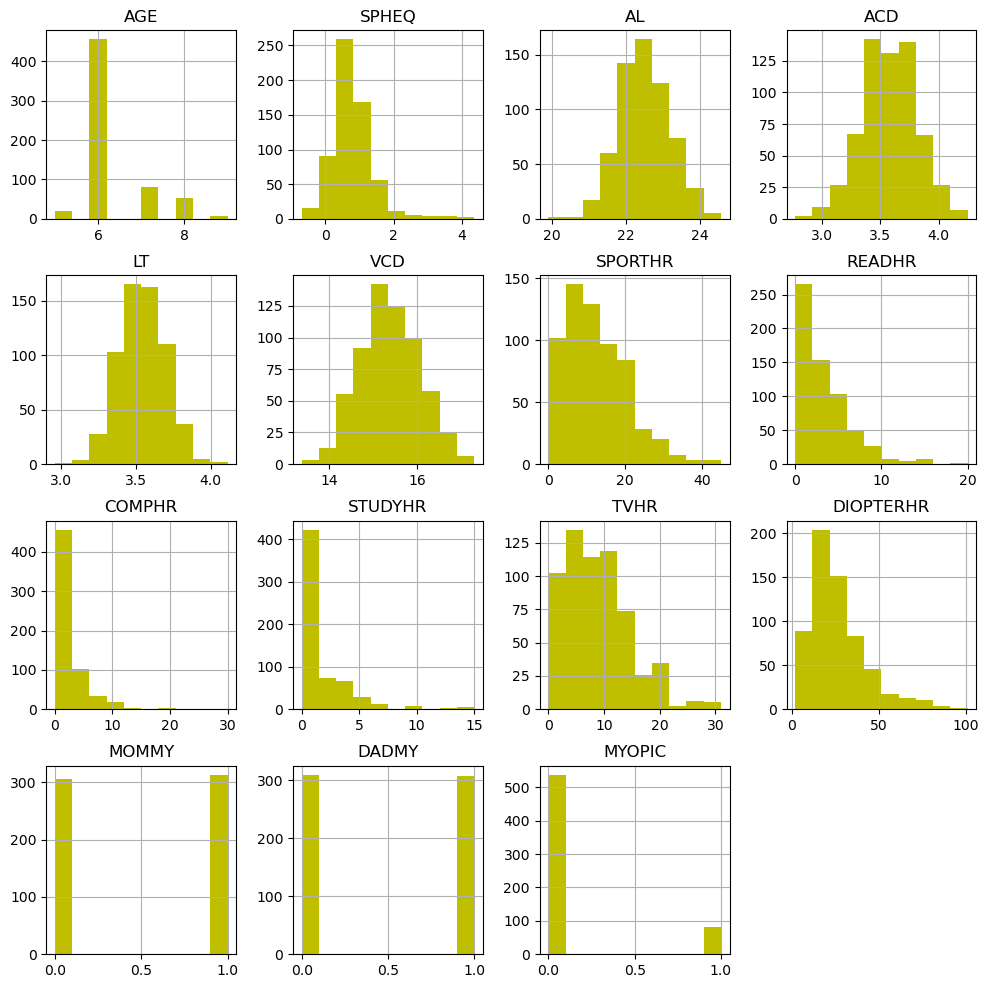

In [66]:
#Histogram
df_myopia.hist(figsize=(12,12),color='y')

In [72]:
#Drop the "MYOPIC" column
df_myopia_new=df_myopia.drop("MYOPIC", axis=1)
df_myopia_new.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0


In [6]:
# check for null values
df_myopia_new.isnull().sum()

AGE          0
SPHEQ        0
AL           0
ACD          0
LT           0
VCD          0
SPORTHR      0
READHR       0
COMPHR       0
STUDYHR      0
TVHR         0
DIOPTERHR    0
MOMMY        0
DADMY        0
dtype: int64

In [7]:
df_myopia_new.var()

AGE            0.508298
SPHEQ          0.391774
AL             0.462592
ACD            0.053081
LT             0.023876
VCD            0.441139
SPORTHR       63.493743
READHR         9.413794
COMPHR         9.342242
STUDYHR        4.911575
TVHR          32.707201
DIOPTERHR    257.015890
MOMMY          0.250363
DADMY          0.250403
dtype: float64

In [8]:
# Standarize data with StandarScaler
myopia_scaled = StandardScaler().fit_transform(df_myopia_new)
print(myopia_scaled[0:5])

[[-0.42021911 -1.3639169  -0.89286146  0.48378402 -0.28144315 -1.0197916
   4.1506609   1.69744958 -0.68931054 -0.67299591  0.18405806  0.49830393
   0.98713773  1.0032415 ]
 [-0.42021911 -0.30861224 -0.1718398   0.53591028 -0.96799728 -0.13076253
  -0.99889822 -0.91206246 -0.36187479 -0.22140908 -0.34093217 -0.87508755
   0.98713773  1.0032415 ]
 [-0.42021911  0.60438629 -0.00997682 -0.5066285  -0.17781207  0.21580879
   0.25709181 -0.91206246 -0.03443904 -0.67299591  0.18405806 -0.75023378
  -1.01302987 -0.99676897]
 [-0.42021911 -0.4413248  -0.43670267  1.23093648  0.4569273  -0.97458715
   0.75948782  2.6760166  -0.68931054 -0.67299591 -0.86592239  0.68558458
  -1.01302987  1.0032415 ]
 [-1.82397807 -0.16630592  1.16720365  0.42296952 -0.56642745  1.18017813
   0.25709181 -0.91206246 -0.68931054 -0.67299591 -0.86592239 -1.37450264
   0.98713773 -0.99676897]]


In [15]:
myopia_scaled.shape

(618, 14)

# Apply Dimensionality Reduction

In [9]:
#PCA(n_components=0.99)
# preserve 90% of the explained variance in dimensionality reduction.

# Initialize PCA model
pca = PCA(n_components=0.99,)

# Get the principal components
myopia_pca = pca.fit_transform(myopia_scaled)

In [16]:
myopia_pca.shape

(618, 12)

In [57]:
#Further reduce the dataset dimensions with t-SNE and visually inspect the results. 
#To do this, run t-SNE on the principal components, which is the output of the PCA transformation.
#tsne = TSNE(n_components=3,verbose=1, perplexity=50, n_iter=500, learning_rate=50)
tsne=TSNE(learning_rate=50,n_components=3)
# Reduce dimensions
tsne_features = tsne.fit_transform(myopia_pca)


C:\Users\elama\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


In [58]:
#To check the reduction in dimensionality
tsne_features.shape

(618, 3)

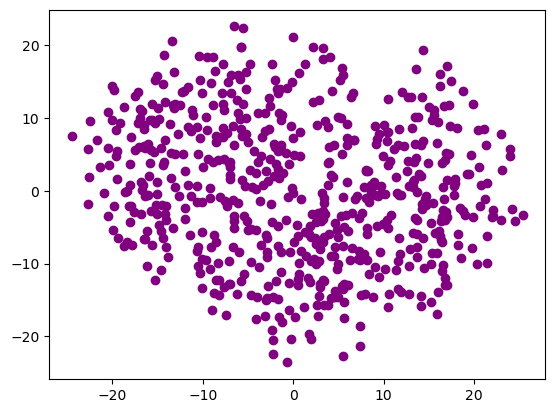

In [59]:
# scatter plot the data
plt.scatter(tsne_features[:,0],tsne_features[:,1],c="purple")

In [62]:
# visualize
#df_tsne = pd.DataFrame(tsne_features, columns=['comp1', 'comp2','comp3'])
df_tsne = pd.DataFrame(tsne_features, columns=['comp1', 'comp2','comp3'])

df_tsne.head()

,comp1,comp2,comp3
0,4.196940,2.140882,-1.002372
1,13.650021,-5.945955,-12.729737
2,-14.393418,3.533960,3.020126
3,7.236781,-3.762423,2.735437
4,-11.940561,-3.829618,-14.423092


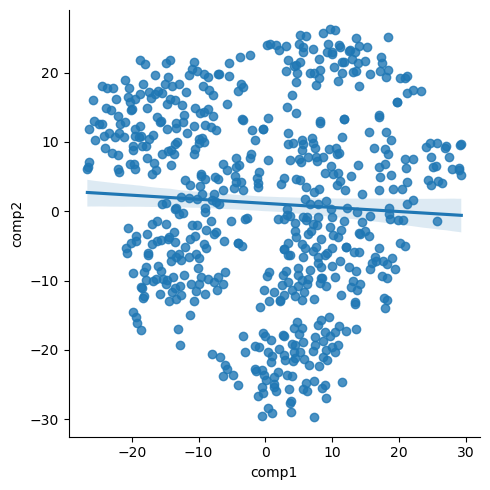

In [61]:
sns.lmplot(data=df_tsne, x="comp1", y="comp2")

C:\Users\elama\anaconda3\lib\site-packages\matplotlib\collections.py:1098: UserWarning: Collection without array used. Make sure to specify the values to be colormapped via the `c` argument.
  warnings.warn("Collection without array used. Make sure to "


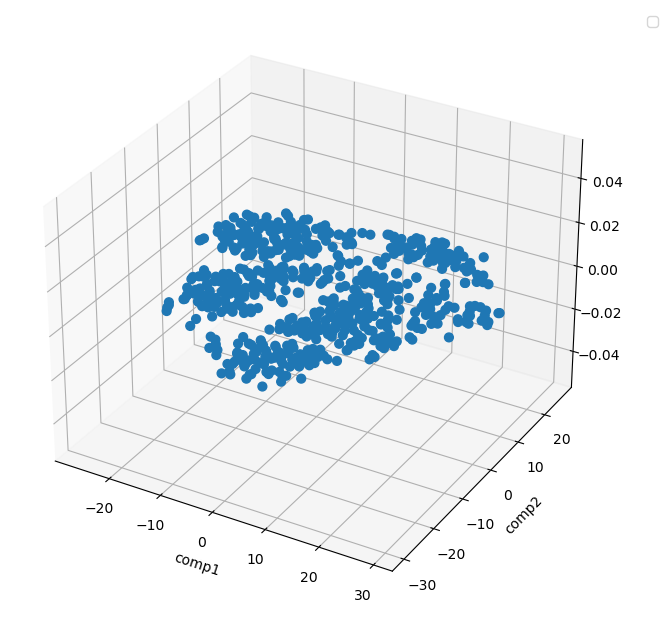

In [56]:
# import re, seaborn as sns
# import numpy as np

# from matplotlib import pyplot as plt
# from mpl_toolkits.mplot3d import Axes3D
# from matplotlib.colors import ListedColormap



# # axes instance
# fig = plt.figure(figsize=(6,6))
# ax = Axes3D(fig, auto_add_to_figure=False)
# fig.add_axes(ax)

# # get colormap from seaborn
# cmap = ListedColormap(sns.color_palette("husl", 256).as_hex())

# # plot
# sc = ax.scatter(df_tsne['comp1'], df_tsne['comp2'], s=40, marker='o', cmap=cmap, alpha=1)
# ax.set_xlabel('comp1')
# ax.set_ylabel('comp2')


# # legend
# plt.legend(*sc.legend_elements(), bbox_to_anchor=(1.05, 1), loc=2)

# # save
# plt.savefig("scatter_hue", bbox_inches='tight')

# Perform a Cluster Analysis with K-means

In [67]:
inertia = []
k = list(range(1, 11))

# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(df_myopia_new)
    inertia.append(km.inertia_)

# Create the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow.head()

C:\Users\elama\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


,k,inertia
0,1,234007.104068
1,2,126211.687610
2,3,93108.597058
3,4,78236.040289
4,5,67245.959484


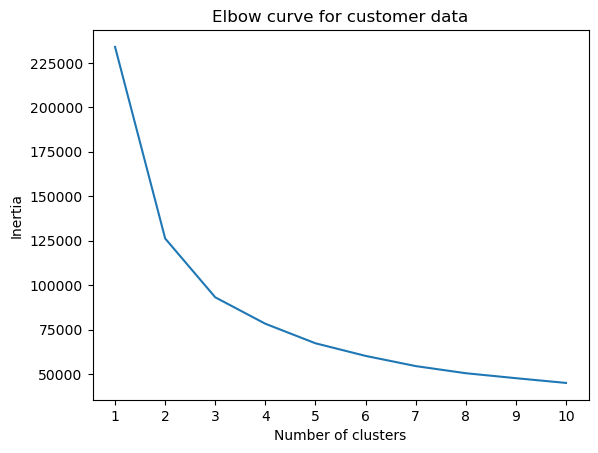

In [73]:
# Plot the elbow curve to find the best candidate(s) for k
plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow curve for customer data')
plt.show()

In [74]:
def get_clusters(k, data):
    # Initialize the K-Means model
    model = KMeans(n_clusters=k, random_state=0)

    # Train the model
    model.fit(data)

    # Predict clusters
    predictions = model.predict(data)

    # Create return DataFrame with predicted clusters
    data["class"] = model.labels_

    return data

In [75]:
clusters = get_clusters(5, df_myopia_new)

In [76]:
clusters

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,class
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1,3
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1,0
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
613,6,0.678,22.400000,3.663,3.803,14.93,2,0,7,3,14,37,1,0,1
614,6,0.665,22.500000,3.570,3.378,15.56,6,0,1,0,8,10,1,1,0
615,6,1.834,22.940001,3.624,3.424,15.89,8,0,0,0,4,4,1,1,0
616,6,0.665,21.920000,3.688,3.598,14.64,12,2,1,0,15,23,0,0,4


In [87]:
def show_clusters(df):
    plt.scatter(df_myopia_new['ACD'], df_myopia_new['AL'], c=df_myopia_new['class'])
    plt.xlabel('ACD')
    plt.ylabel('AL')
    plt.show()

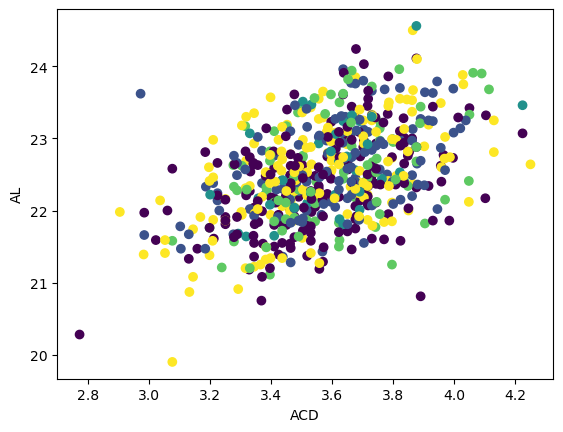

In [88]:
show_clusters(clusters)